## Importing modules and newsapi integration

In [16]:
import requests
import pandas as pd
import re
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS 

# Define your API key
api_key = 'db5243b2ac8d4d748a047b24a3f5a008'

# Define the endpoint and parameters
url = 'https://newsapi.org/v2/everything'
params = {
    'q': 'Texas hurricane',
    'sortBy': 'relevance',
    'apiKey': api_key,
    'pageSize': 100  # Get up to 100 articles
}

# Make the request and get the response
response = requests.get(url, params=params)
data = response.json()

# Check if the request was successful
if data['status'] == 'ok':
    articles = data['articles']
    df = pd.DataFrame(articles)
    df.to_csv('texas_hurricanes.csv', index=False)
    print('Articles fetched and saved successfully.')
else:
    print('Failed to fetch articles:', data['message'])


Articles fetched and saved successfully.


## Saving scraped articles to CSV

In [17]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('texas_hurricanes.csv')

# Display the columns to check their names
print(df.columns)

# Adjust column selection based on the actual column names
df = df[['source', 'author', 'title', 'description', 'content', 'publishedAt']]

# Drop rows with missing content
df.dropna(subset=['content'], inplace=True)

# Function to remove the word 'chars' from text
def remove_chars_word(text):
    # Use re.sub with case insensitivity flag (re.IGNORECASE)
    return re.sub(r'\bchars\b', '', text, flags=re.IGNORECASE)

# Apply the function to remove 'chars' from the 'content' column
df['content'] = df['content'].apply(remove_chars_word)

# Save the cleaned DataFrame back to CSV
df.to_csv('cleaned_texas_hurricanes.csv', index=False)


Index(['source', 'author', 'title', 'description', 'url', 'urlToImage',
       'publishedAt', 'content'],
      dtype='object')


## Cleaning CSV Data

In [18]:
import pandas as pd
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the data from the CSV file
df = pd.read_csv('cleaned_texas_hurricanes.csv')

# Display the columns to check their names
print(df.columns)

# Adjust column selection based on the actual column names
df = df[['source', 'author', 'title', 'description', 'content', 'publishedAt']]

# Drop rows with missing content
df.dropna(subset=['content'], inplace=True)

# Initialize Sentiment Intensity Analyzer from NLTK
sid = SentimentIntensityAnalyzer()

def calculate_sentiment(text):
    # Using TextBlob for sentiment polarity calculation
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment calculation to each row in 'content' column
df['sentiment_score'] = df['content'].apply(calculate_sentiment)

# Now you can continue with your text analysis and visualization using df
print(df.head())


Index(['source', 'author', 'title', 'description', 'content', 'publishedAt'], dtype='object')
                                              source  \
0  {'id': 'business-insider', 'name': 'Business I...   
1                        {'id': None, 'name': 'NPR'}   
2             {'id': 'abc-news', 'name': 'ABC News'}   
3             {'id': 'cbs-news', 'name': 'CBS News'}   
4                        {'id': None, 'name': 'NPR'}   

                       author  \
0              Ellyn Lapointe   
1             Rachel Treisman   
2  Max Golembo, Emily Shapiro   
3           Emily Mae Czachor   
4             Rebecca Hersher   

                                               title  \
0  A Texas coastal engineer says a simple home-bu...   
1  Tropical Storm Alberto, the first of the seaso...   
2  Tropical Storm Alberto expected to form, bring...   
3  First tropical storm warning of hurricane seas...   
4  FAQ: 5 things to know about weather forecasts ...   

                                 

In [19]:
# Example: Assuming 'calculate_sentiment' is a function that calculates sentiment score for text
df['sentiment'] = df['content'].apply(lambda x: calculate_sentiment(x))


## StopWords

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return tokens

# Apply preprocessing to the 'content' column
df['processed_content'] = df['content'].apply(preprocess)


[nltk_data] Downloading package punkt to /Users/peter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/peter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Assuming you have already imported pandas as pd and loaded your data into df

# Function to remove the word 'chars' from text
def remove_chars_word(text):
    return text.replace('Chars', '')

# Apply the function to remove 'chars' from the 'content' column
df['content'] = df['content'].apply(remove_chars_word)

# Now you can continue with your text analysis and visualization using df
print(df.head())


                                              source  \
0  {'id': 'business-insider', 'name': 'Business I...   
1                        {'id': None, 'name': 'NPR'}   
2             {'id': 'abc-news', 'name': 'ABC News'}   
3             {'id': 'cbs-news', 'name': 'CBS News'}   
4                        {'id': None, 'name': 'NPR'}   

                       author  \
0              Ellyn Lapointe   
1             Rachel Treisman   
2  Max Golembo, Emily Shapiro   
3           Emily Mae Czachor   
4             Rebecca Hersher   

                                               title  \
0  A Texas coastal engineer says a simple home-bu...   
1  Tropical Storm Alberto, the first of the seaso...   
2  Tropical Storm Alberto expected to form, bring...   
3  First tropical storm warning of hurricane seas...   
4  FAQ: 5 things to know about weather forecasts ...   

                                         description  \
0  This year could the worst hurricane seasons in...   
1  The first na

In [22]:
df['content'] = df['content'].str.replace('chars', '')

Columns in the dataset: Index(['source', 'author', 'title', 'description', 'url', 'urlToImage',
       'publishedAt', 'content'],
      dtype='object')


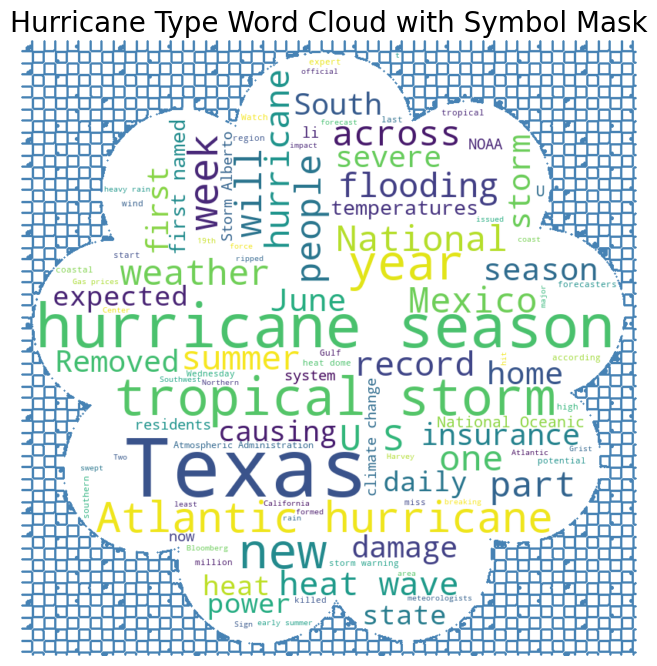

Cleaned data saved to 'cleaned_texas_hurricanes.csv'


In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the data from the CSV file
df = pd.read_csv('texas_hurricanes.csv')

# Display the columns to check their names
print("Columns in the dataset:", df.columns)

# Adjust column selection based on the actual column names
df = df[['source', 'author', 'title', 'description', 'content', 'publishedAt']]

# Drop rows with missing content
df.dropna(subset=['content'], inplace=True)

# Function to remove the word 'chars' from text
def remove_chars_word(text):
    # Use re.sub with case insensitivity flag (re.IGNORECASE)
    return re.sub(r'\bchars\b', '', text, flags=re.IGNORECASE)

# Apply the function to remove 'chars' from the 'content' column
df['content'] = df['content'].apply(remove_chars_word)

# Concatenate all text from the 'content' column to create a single string
all_text = ' '.join(df['content'].tolist())

# Load a hurricane symbol mask image
mask = np.array(Image.open("wc1.png"))

# Generate word cloud using the mask
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', 
                      max_words=100, mask=mask, contour_width=3, contour_color='steelblue',
                      stopwords=None).generate(all_text)

# Display the word cloud with the mask
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Hurricane Type Word Cloud with Symbol Mask', fontsize=20)
plt.axis('off')
plt.show()

# Save the cleaned DataFrame back to CSV
df.to_csv('cleaned_texas_hurricanes.csv', index=False)

print("Cleaned data saved to 'cleaned_texas_hurricanes.csv'")



In [24]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each article content
df['sentiment'] = df['content'].apply(lambda x: sid.polarity_scores(x)['compound'])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/peter/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
# Drop rows with missing content
df.dropna(subset=['content'], inplace=True)


# wordcloud for positive sentiment

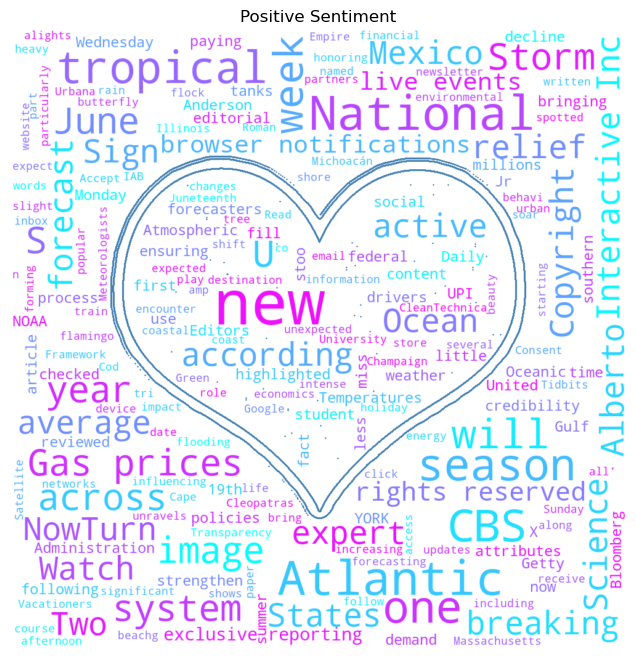

Cleaned data saved to 'cleaned_texas_hurricanes.csv'


In [44]:

# Perform sentiment analysis
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Filter articles with positive sentiment
positive_articles = df[df['sentiment'] > 0]['content']

# Combine positive sentiment content into a single text
positive_text = ' '.join(positive_articles)

# Load a custom mask image
mask = np.array(Image.open('wc9.png'))

# Define custom stopwords
custom_stopwords = set(STOPWORDS).union({"chars", "hurricane", "texas"})

# Generate a stylish word cloud for positive sentiment
wordcloud_positive = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='cool', 
    mask=mask, 
    contour_width=3, 
    contour_color='steelblue',
    stopwords=custom_stopwords,
    max_font_size=100,
    min_font_size=10
).generate(positive_text)

# Plot word cloud for positive sentiment
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title( 'Positive Sentiment')
plt.show()

# Save the cleaned DataFrame back to CSV
df.to_csv('cleaned_texas_hurricanes.csv', index=False)

print("Cleaned data saved to 'cleaned_texas_hurricanes.csv'")



# wordcloud for negative sentiment

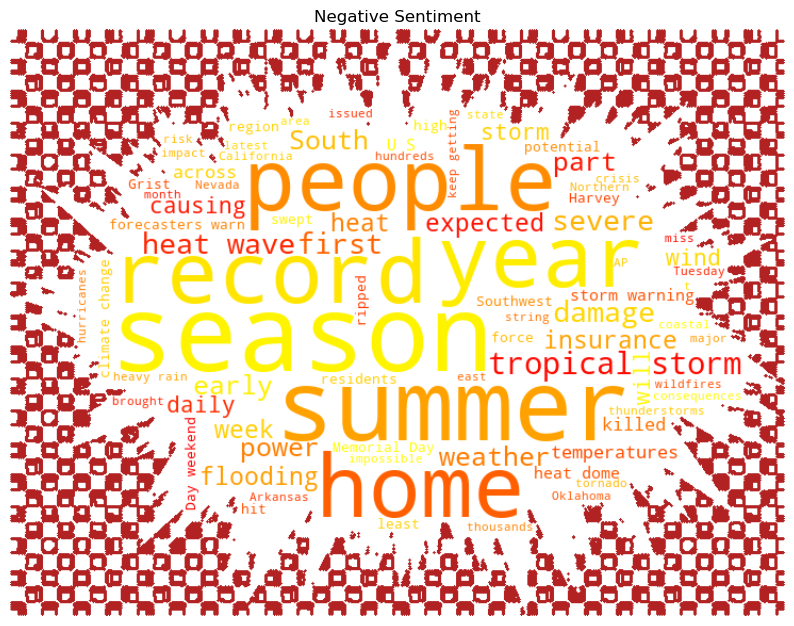

Cleaned data saved to 'cleaned_texas_hurricanes.csv'


In [46]:

# Perform sentiment analysis
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Filter articles with negative sentiment
negative_articles = df[df['sentiment'] < 0]['content']

# Combine negative sentiment content into a single text
negative_text = ' '.join(negative_articles)

# Load a custom mask image
mask = np.array(Image.open('wc3.png'))

# Define custom stopwords
custom_stopwords = set(STOPWORDS).union({"chars", "hurricane", "texas"})

# Generate a stylish word cloud for negative sentiment
wordcloud_negative = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='autumn', 
    mask=mask, 
    contour_width=3, 
    contour_color='firebrick',
    stopwords=custom_stopwords,
    max_font_size=100,
    min_font_size=10
).generate(negative_text)

# Plot word cloud for negative sentiment
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title( 'Negative Sentiment')
plt.show()

# Save the cleaned DataFrame back to CSV
df.to_csv('cleaned_texas_hurricanes.csv', index=False)

print("Cleaned data saved to 'cleaned_texas_hurricanes.csv'")




In [28]:
# Print all column names to verify if 'sentiment' is present
print(df.columns)


Index(['source', 'author', 'title', 'description', 'content', 'publishedAt',
       'sentiment'],
      dtype='object')


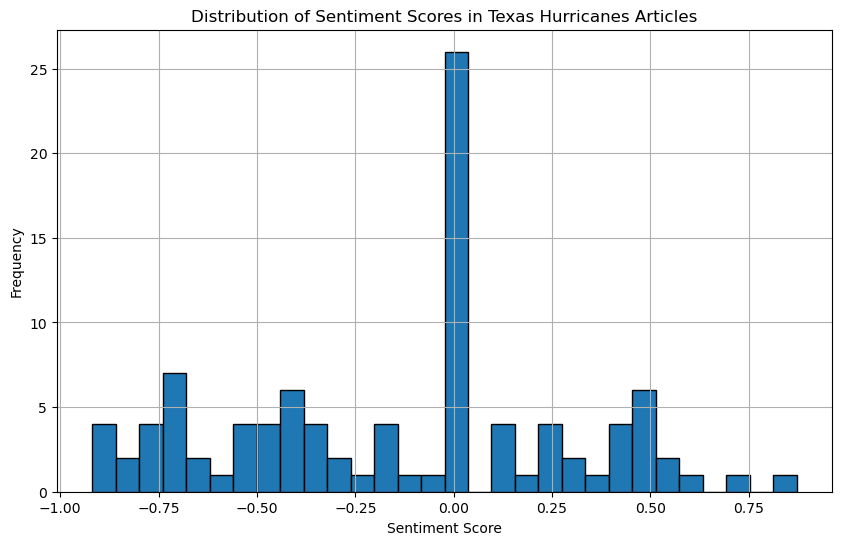

In [29]:
# Plot histogram of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment'], bins=30, edgecolor='black')
plt.title('Distribution of Sentiment Scores in Texas Hurricanes Articles')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


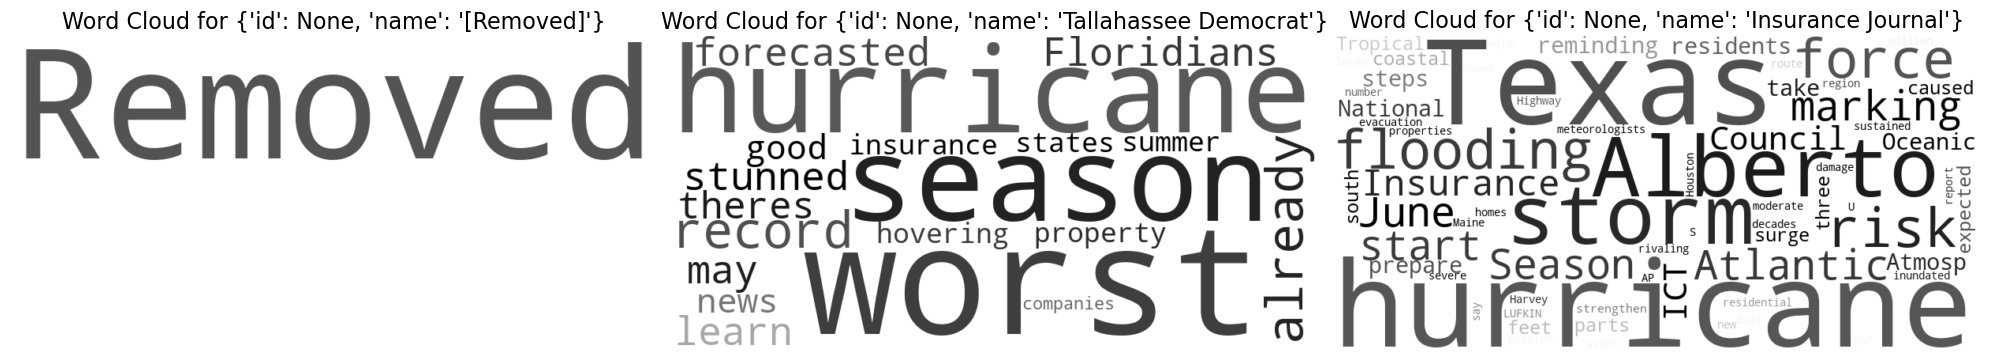

In [52]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load your custom mask image (replace 'mask_image.png' with your image file)
mask_image = np.array(Image.open('wc5.png'))

# Assuming 'source' column exists in your DataFrame
source_content = df.groupby('source')['content'].apply(lambda x: ' '.join(x))

# Get top 3 sources by content length
top_sources = source_content.sort_values(ascending=False).head(3)

# Generate word cloud for each of the top 3 sources, excluding {'id': None, 'name': '[Removed]'}
plt.figure(figsize=(20, 10))
for i, (source, content) in enumerate(top_sources.items(), start=1):
    if isinstance(source, dict) and source.get('name') == 'Removed':
        continue  # Skip this source
    
    # Generate word cloud with custom mask
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab20b',
                          max_words=100, mask=mask_image, contour_color='steelblue', contour_width=2,
                          random_state=42).generate(content)
    
    # Use image color generator to set colors based on mask image
    image_colors = ImageColorGenerator(mask_image)
    
    # Plotting each word cloud
    plt.subplot(1, 3, i)  # 1 row, 3 columns for 3 subplots
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
    plt.title(f'Word Cloud for {source}', fontsize=16)
    plt.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()





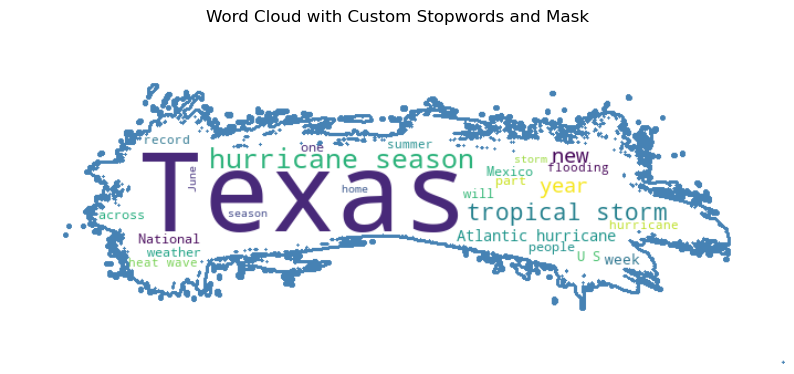

Cleaned data saved to 'cleaned_texas_hurricanes.csv'


In [50]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define custom stopwords
custom_stopwords = set(STOPWORDS).union({'is', 'for', 'the', 'a', 'and', 'in', 'of', 'to', 'this', 'with', 'on', 'another', 'yet'})

# Load a custom mask image
mask = np.array(Image.open('wc8.png'))

# Define the text data (assuming all_content contains the text of all articles)
all_content = " ".join(df['content'])  # Assuming 'content' is the column name containing the article text

# Generate a unique word cloud with custom stopwords and mask
wordcloud_unique = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords,
    mask=mask,
    contour_width=3,
    contour_color='steelblue',
    colormap='viridis',
    max_words=200,
    max_font_size=100,
    min_font_size=10
).generate(all_content)

# Plot the unique word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_unique, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud with Custom Stopwords and Mask')
plt.show()

# Save the cleaned DataFrame back to CSV
df.to_csv('cleaned_texas_hurricanes.csv', index=False)

print("Cleaned data saved to 'cleaned_texas_hurricanes.csv'")




In [32]:
def calculate_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(text)
    return scores['compound']  # Return the compound score

# Apply sentiment analysis to 'content' column and store results in 'sentiment' column
df['sentiment'] = df['content'].apply(calculate_sentiment)

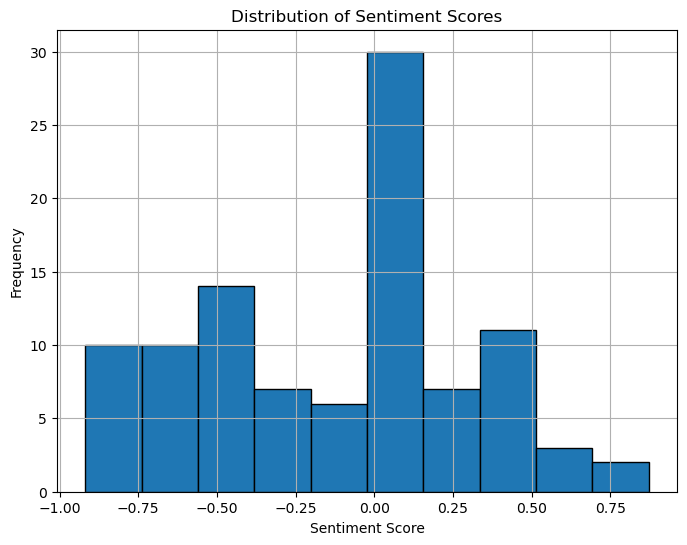

In [33]:
import matplotlib.pyplot as plt

# Sample sentiment scores (replace with your actual data)
sentiment_scores = df['sentiment']

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(sentiment_scores, bins=10, edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


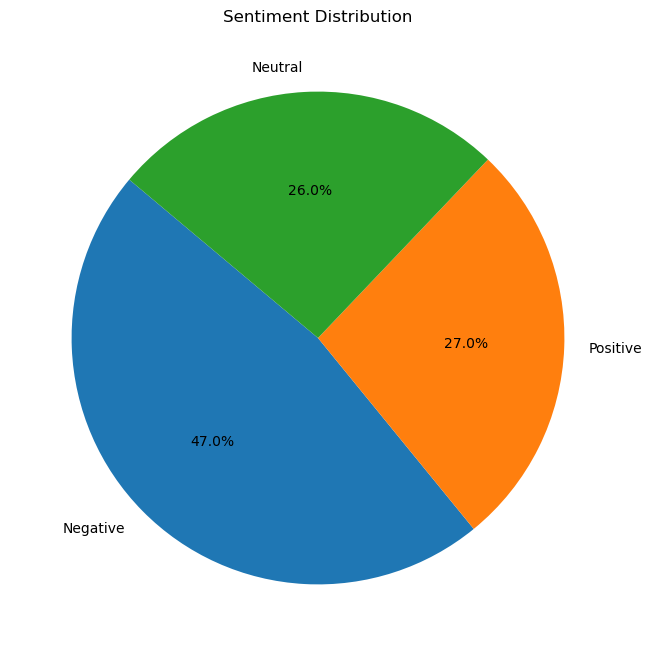

In [34]:
# Count sentiment categories
sentiment_counts = df['sentiment'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral')).value_counts()

# Plot pie chart of sentiment distribution
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()


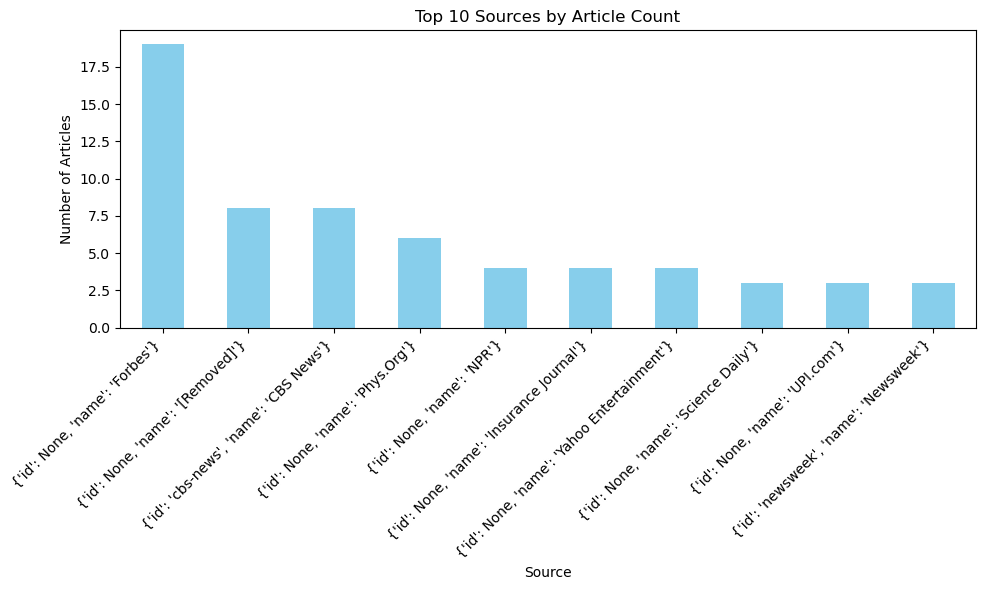

In [35]:
plt.figure(figsize=(10, 6))
source_counts = df['source'].value_counts().head(10)
source_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Sources by Article Count')
plt.xlabel('Source')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Date: 1970-01-01, Count: 8
Date: 1970-01-02, Count: 0
Date: 1970-01-03, Count: 0
Date: 1970-01-04, Count: 0
Date: 1970-01-05, Count: 0
Date: 1970-01-06, Count: 0
Date: 1970-01-07, Count: 0
Date: 1970-01-08, Count: 0
Date: 1970-01-09, Count: 0
Date: 1970-01-10, Count: 0
Date: 1970-01-11, Count: 0
Date: 1970-01-12, Count: 0
Date: 1970-01-13, Count: 0
Date: 1970-01-14, Count: 0
Date: 1970-01-15, Count: 0
Date: 1970-01-16, Count: 0
Date: 1970-01-17, Count: 0
Date: 1970-01-18, Count: 0
Date: 1970-01-19, Count: 0
Date: 1970-01-20, Count: 0
Date: 1970-01-21, Count: 0
Date: 1970-01-22, Count: 0
Date: 1970-01-23, Count: 0
Date: 1970-01-24, Count: 0
Date: 1970-01-25, Count: 0
Date: 1970-01-26, Count: 0
Date: 1970-01-27, Count: 0
Date: 1970-01-28, Count: 0
Date: 1970-01-29, Count: 0
Date: 1970-01-30, Count: 0
Date: 1970-01-31, Count: 0
Date: 1970-02-01, Count: 0
Date: 1970-02-02, Count: 0
Date: 1970-02-03, Count: 0
Date: 1970-02-04, Count: 0
Date: 1970-02-05, Count: 0
Date: 1970-02-06, Count: 0
D

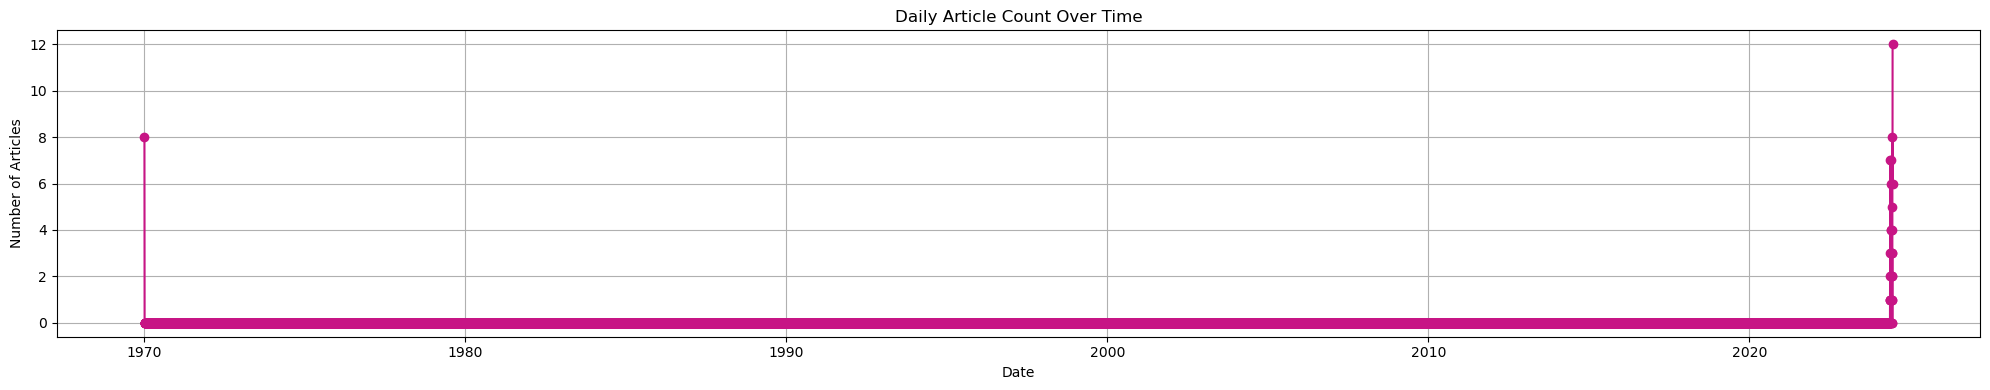

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'publishedAt' is datetime type
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Resample to daily counts
daily_counts = df.resample('D', on='publishedAt').size()

# Print data points
for date, count in daily_counts.items():
    print(f'Date: {date.date()}, Count: {count}')

# Plot the data
plt.figure(figsize=(20, 4))
plt.plot(daily_counts.index, daily_counts.values, marker='o', color='mediumvioletred')
plt.title('Daily Article Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.show()


Date: 1970-01-04, Count: 8
Date: 1970-01-11, Count: 0
Date: 1970-01-18, Count: 0
Date: 1970-01-25, Count: 0
Date: 1970-02-01, Count: 0
Date: 1970-02-08, Count: 0
Date: 1970-02-15, Count: 0
Date: 1970-02-22, Count: 0
Date: 1970-03-01, Count: 0
Date: 1970-03-08, Count: 0
Date: 1970-03-15, Count: 0
Date: 1970-03-22, Count: 0
Date: 1970-03-29, Count: 0
Date: 1970-04-05, Count: 0
Date: 1970-04-12, Count: 0
Date: 1970-04-19, Count: 0
Date: 1970-04-26, Count: 0
Date: 1970-05-03, Count: 0
Date: 1970-05-10, Count: 0
Date: 1970-05-17, Count: 0
Date: 1970-05-24, Count: 0
Date: 1970-05-31, Count: 0
Date: 1970-06-07, Count: 0
Date: 1970-06-14, Count: 0
Date: 1970-06-21, Count: 0
Date: 1970-06-28, Count: 0
Date: 1970-07-05, Count: 0
Date: 1970-07-12, Count: 0
Date: 1970-07-19, Count: 0
Date: 1970-07-26, Count: 0
Date: 1970-08-02, Count: 0
Date: 1970-08-09, Count: 0
Date: 1970-08-16, Count: 0
Date: 1970-08-23, Count: 0
Date: 1970-08-30, Count: 0
Date: 1970-09-06, Count: 0
Date: 1970-09-13, Count: 0
D

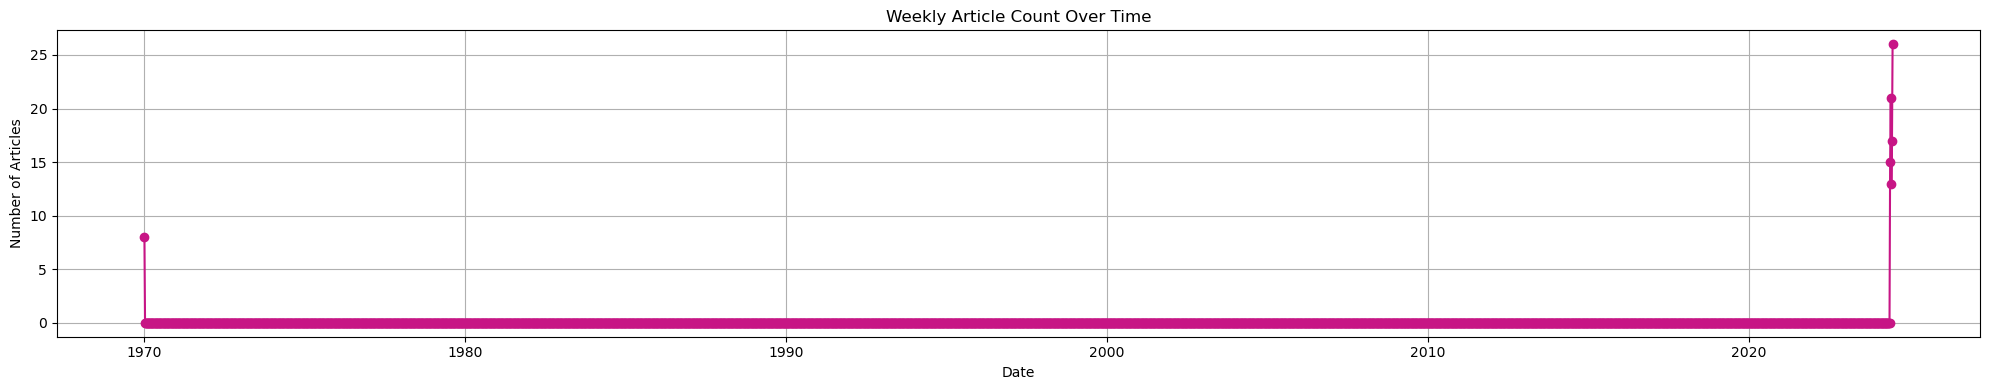

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'publishedAt' is datetime type
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Resample to weekly counts
weekly_counts = df.resample('W', on='publishedAt').size()

# Print data points
for date, count in weekly_counts.items():
    print(f'Date: {date.date()}, Count: {count}')

# Plot the data
plt.figure(figsize=(20, 4))
plt.plot(weekly_counts.index, weekly_counts.values, marker='o', color='mediumvioletred')
plt.title('Weekly Article Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.show()


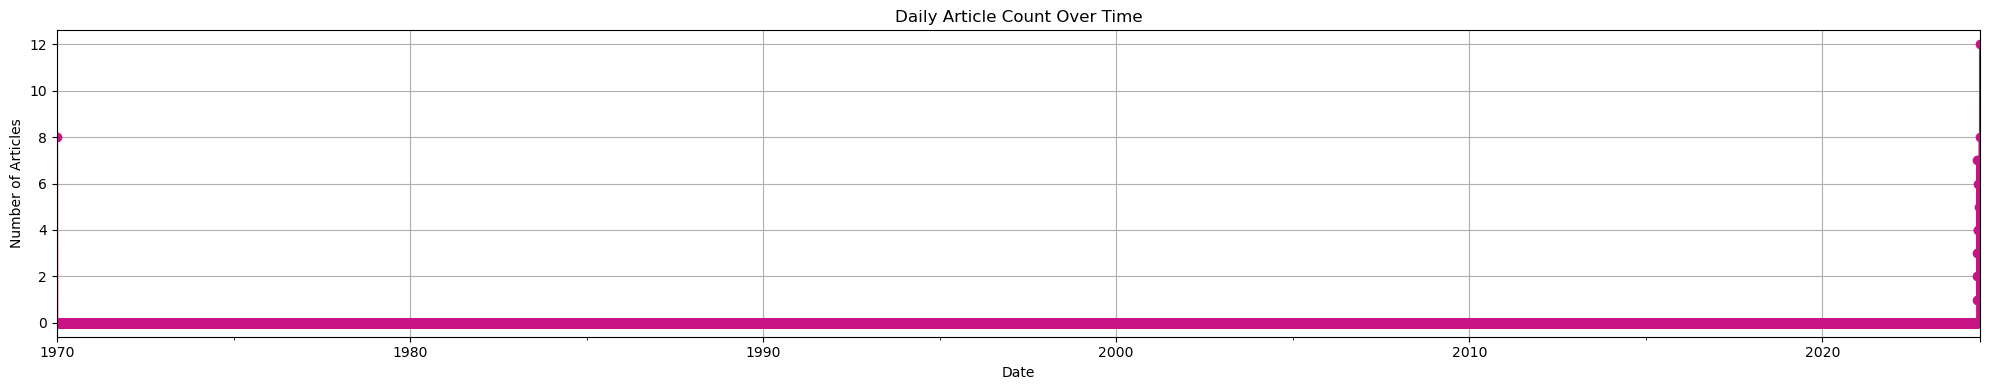

In [38]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
daily_counts = df.resample('D', on='publishedAt').size()

plt.figure(figsize=(20, 4))
daily_counts.plot(kind='line', marker='o', color='mediumvioletred')
plt.title('Daily Article Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.show()




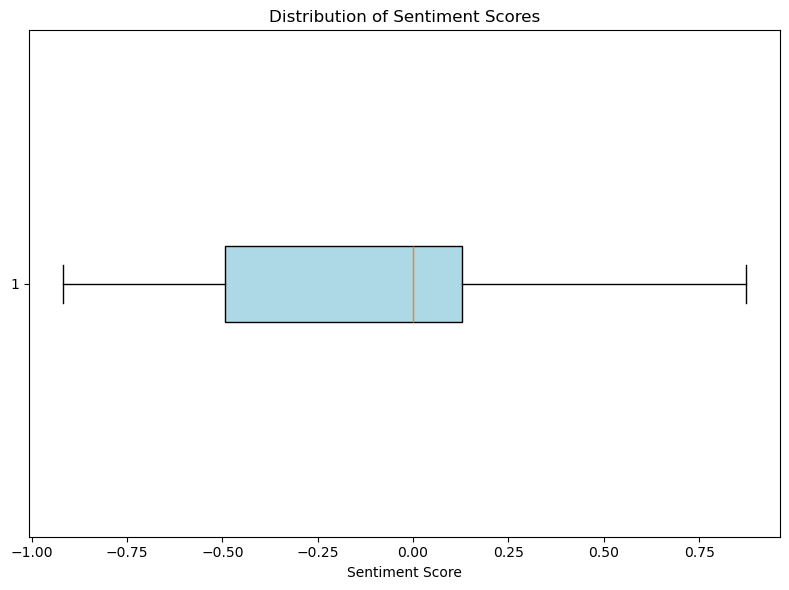

In [39]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['sentiment'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.tight_layout()
plt.show()


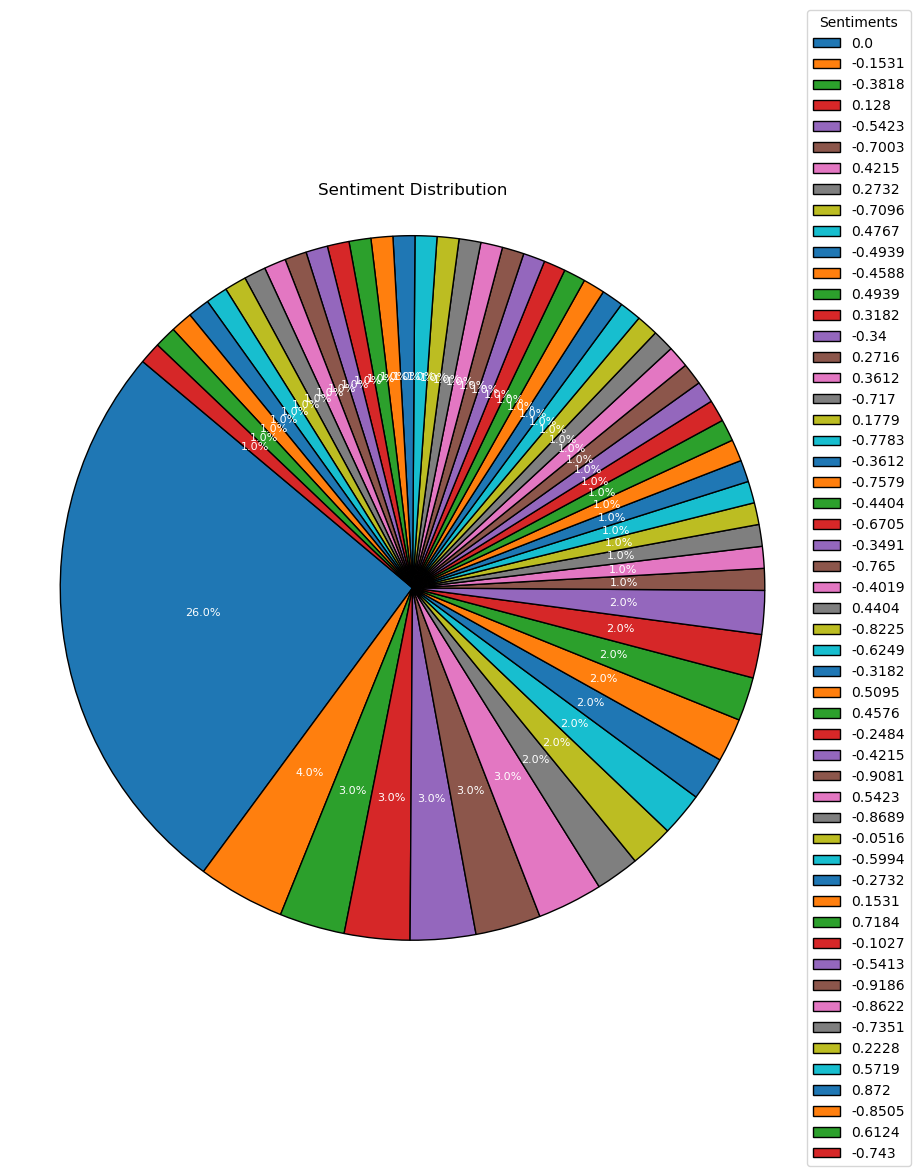

In [40]:

# Ensure the 'sentiment' column exists in the dataframe
if 'sentiment' in df.columns:
    # Calculate the sentiment value counts
    sentiment_counts = df['sentiment'].value_counts()

    # Plot the pie chart for sentiment distribution
    plt.figure(figsize=(10, 10))
    wedges, texts, autotexts = plt.pie(
        sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140,
        textprops=dict(color="w"), wedgeprops=dict(edgecolor='k', linewidth=1)
    )

    # Customize the text size and appearance
    for text in texts:
        text.set_fontsize(8)
    for autotext in autotexts:
        autotext.set_fontsize(8)

    # Add a legend for clarity
    plt.legend(wedges, sentiment_counts.index, title="Sentiments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.title('Sentiment Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("The 'sentiment' column is not present in the dataframe.")


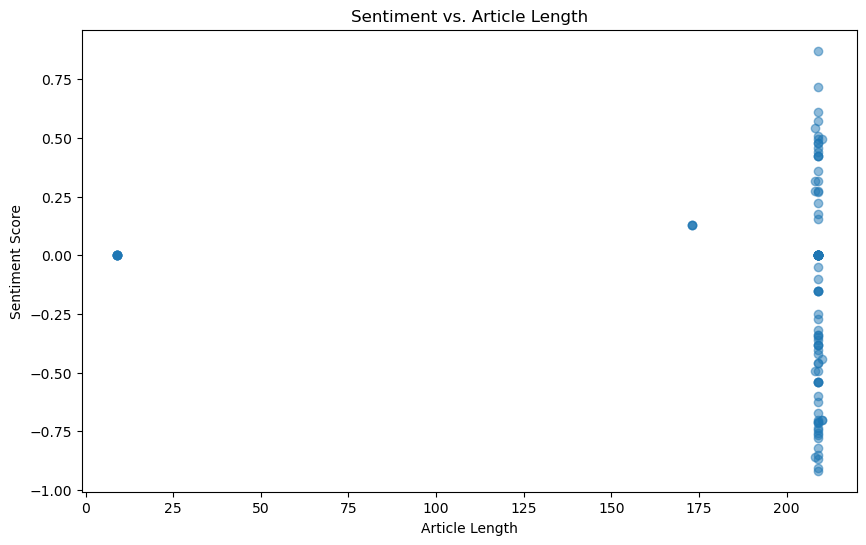

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(df['content'].apply(len), df['sentiment'], alpha=0.5)
plt.title('Sentiment vs. Article Length')
plt.xlabel('Article Length')
plt.ylabel('Sentiment Score')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


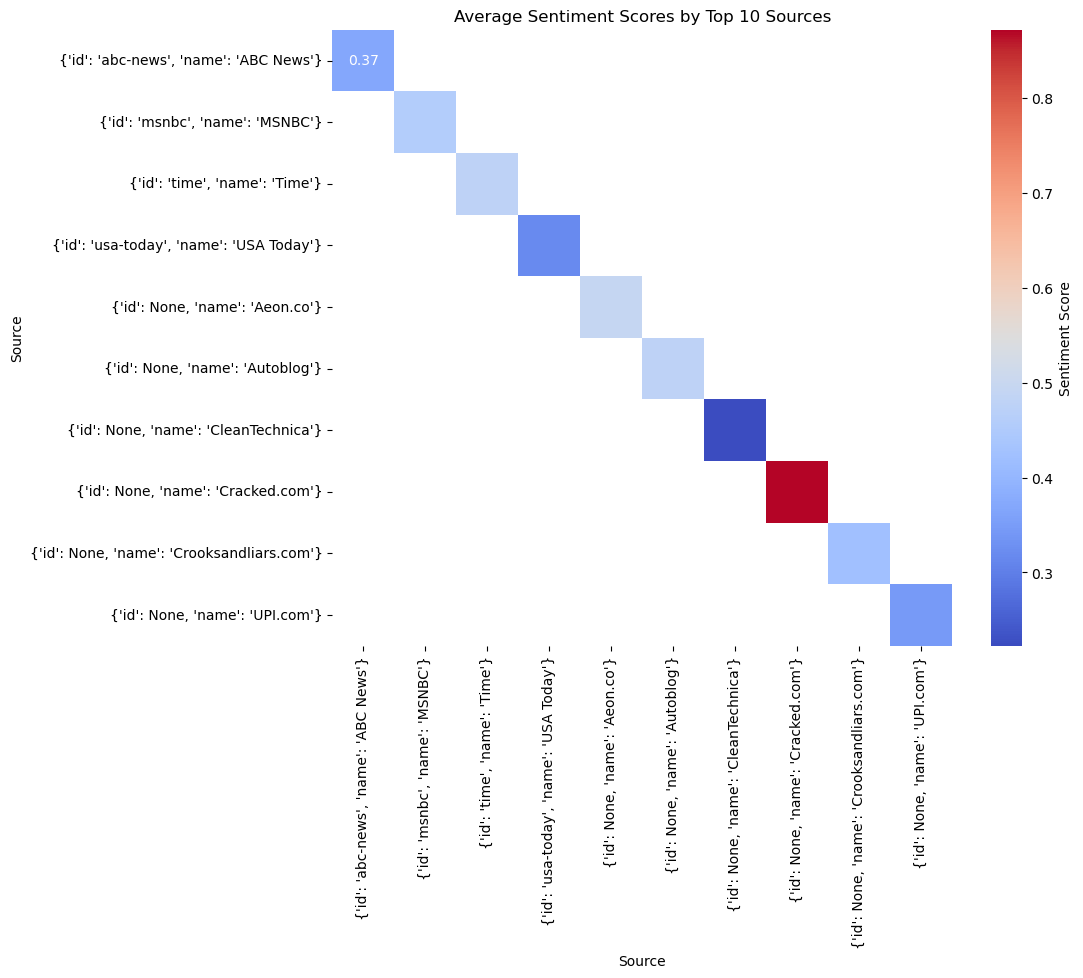

In [42]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Get top 10 sources by average sentiment score
top_sources = df.groupby('source')['sentiment'].mean().nlargest(10).index

# Filter DataFrame to include only top 10 sources
df_filtered = df[df['source'].isin(top_sources)]

# Calculate mean sentiment score by source
sentiment_by_source = df_filtered.groupby('source')['sentiment'].mean().reset_index()

# Create a pivot table for heatmap data
heatmap_data = sentiment_by_source.pivot_table(index='source', columns='source', values='sentiment', aggfunc='mean')

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Sentiment Score'})
plt.title('Average Sentiment Scores by Top 10 Sources')
plt.xlabel('Source')
plt.ylabel('Source')
plt.show()


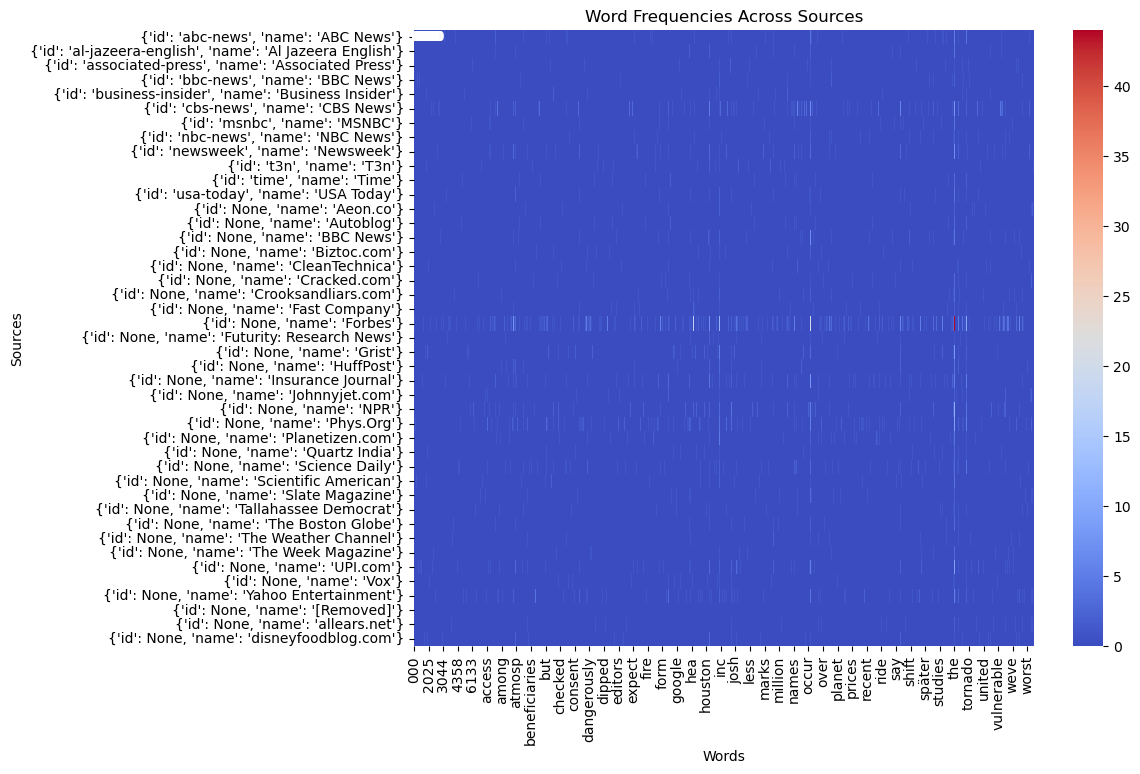

In [43]:
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Example: Assuming 'source' and 'content' columns exist in your DataFrame
top_sources = df.groupby('source')['sentiment'].mean().nlargest(10).index

# Filter DataFrame to include only top 10 sources
df_filtered = df[df['source'].isin(top_sources)]
# Group by source and join all content into single strings
source_content = df.groupby('source')['content'].apply(lambda x: ' '.join(x))

# Create a CountVectorizer to get word counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(source_content.values)

# Create a DataFrame of word counts
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=source_content.index)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(word_counts, cmap='coolwarm', annot=True, fmt='d')
plt.title('Word Frequencies Across Sources')
plt.xlabel('Words')
plt.ylabel('Sources')
plt.show()
